In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

In [18]:
datapath = Path(Path().resolve()).parent.parent.parent / 'data'
optimization_datapath = datapath / 'optimization data' / 'sensitivity analysis'
# exp_name = 'cvar_con_exp_obj_5'
# exp_name = 'cvar_con_exp_obj_5_full'

In [19]:
def make_exp_name(optimization_settings):
    exp_name = optimization_settings['wl_constraint_type']
    if exp_name == 'cvar':
        exp_name += f'_{optimization_settings["cvar_alpha"]}'
        exp_name += f'_{abs(optimization_settings["cvar_wl"])}'
    elif exp_name == 'chance':
        exp_name += f'_{optimization_settings["p_chance"]}'
    elif exp_name == 'robust':
        pass
    else:
        raise NotImplementedError('Only implemented for cvar, chance and rosbut')
    exp_name += f'_{optimization_settings["distance"]}'
    exp_name += f'_{optimization_settings["n_scenarios"]}'
    if optimization_settings['tree']:
        exp_name += '_tree'
    else:
        exp_name += '_fan'
    if optimization_settings["distance"] == 'obs':
        exp_name = 'obs'
    return exp_name

In [20]:

scenario_path = datapath / 'forecast data' / 'Scenarios'
market_datapath = datapath / 'market data'
wl_datapath = datapath / 'waterlevel data'
wb_datapath = datapath / 'waterboard data'
ark_datapath = datapath / 'ark data'

optimization_datapath = datapath / 'optimization data'
n_root_steps = 3
n_scenarios = 2

n_q_scenarios = n_scenarios
n_dam_scenarios = n_scenarios
n_idm_scenarios = n_scenarios
n_wl_scenarios = n_scenarios

if (n_q_scenarios <= 3):
    n_wb_scenarios = 2
else:
    n_wb_scenarios = n_q_scenarios

distance_metric = 'energy'
scenario_params = {
    'DAM': {
        'n': n_dam_scenarios,
        'method': distance_metric,
    },
    'IDM':{
        'n_init': 100,
        'n': n_idm_scenarios,
        'method': distance_metric,
    },
    'wl': {
        'n': n_wl_scenarios,
        'method': distance_metric,
    },
    'discharge': {
        'n': n_q_scenarios,
        'n_wb': n_wb_scenarios,
        'method': distance_metric
    },
    'n_root_steps': n_root_steps
}

optimization_settings = {
    'wl_constraint_type': 'cvar',
    'var_wl': -0.4,
    'cvar_wl': -0.395,
    'cvar_alpha': 0.99,
    # 'p_chance': 0,
    'obj_type': 'expected_value',
    'refit_idm_bn_every': 7*24, # every week
    'start_wl': -0.45, # m+NAP
    'distance': distance_metric,
    'n_scenarios': n_scenarios,
    'tree': False#cfg.tree_based
}

In [13]:
exp_name = make_exp_name(optimization_settings)
exp_name

'cvar_0.99_0.395_energy_2_fan'

In [17]:
df = pd.read_pickle(optimization_datapath / f'{exp_name}' / 'simulation_data.pkl')


In [15]:
df.dropna(how='all')

,h_nzk,Q_gate,Q_pump,Q_wb,Q_ark,E_act,E_dam,h_ns,p_dam,p_idm
2019-01-01 10:00:00+01:00,-0.45,0,0,0,0,0,0,0,0,0
2019-01-01 11:00:00+01:00,-0.4497,0.0,0.0,9.35,25.07,0.0,0,0.577,62.62,55.55
2019-01-01 12:00:00+01:00,-0.4493,0.0,0.0,11.84,26.38,0.0,0,1.187,57.4,94.29
2019-01-01 13:00:00+01:00,-0.449,0.0,0.0,12.5,18.27,0.0,0,1.41,50.76,70.1
2019-01-01 14:00:00+01:00,-0.4488,0.0,0.0,11.81,7.37,0.0,0,1.333,49.92,67.96
...,...,...,...,...,...,...,...,...,...,...
2019-01-29 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-29 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.008334,NaN,NaN,NaN
2019-01-29 21:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-29 22:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [16]:
df.dropna()

,h_nzk,Q_gate,Q_pump,Q_wb,Q_ark,E_act,E_dam,h_ns,p_dam,p_idm
2019-01-01 10:00:00+01:00,-0.45,0,0,0,0,0,0,0,0,0
2019-01-01 11:00:00+01:00,-0.4497,0.0,0.0,9.35,25.07,0.0,0,0.577,62.62,55.55
2019-01-01 12:00:00+01:00,-0.4493,0.0,0.0,11.84,26.38,0.0,0,1.187,57.4,94.29
2019-01-01 13:00:00+01:00,-0.449,0.0,0.0,12.5,18.27,0.0,0,1.41,50.76,70.1
2019-01-01 14:00:00+01:00,-0.4488,0.0,0.0,11.81,7.37,0.0,0,1.333,49.92,67.96
...,...,...,...,...,...,...,...,...,...,...
2019-01-28 09:00:00+01:00,-0.3997,0.0,33.11,172.86,3.72,0.605315,0.151459,1.107,59.92,55.88
2019-01-28 10:00:00+01:00,-0.3994,0.0,154.19,168.88,11.82,3.948837,0.175161,1.398,53.43,50.98
2019-01-28 11:00:00+01:00,-0.3995,0.0,188.32,151.29,31.32,4.546597,0.56285,1.173,55.78,53.14
2019-01-28 12:00:00+01:00,-0.3995,0.0,168.92,139.78,32.78,3.285958,1.062335,0.82,53.79,48.84


In [103]:
# plotter.df.to_pickle(optimization_datapath / f'{exp_name}' / 'simulation_data.pkl')

In [104]:
class ResultPlotter():
    def __init__(self, df, plotind=None):
        self.df = df
        if plotind is None:
            self.plotind = df.dropna().index[1:]
        else:
            self.plotind = plotind

        self.colorlist = [
            '#377eb8', '#ff7f00', '#4daf4a',
            '#f781bf', '#a65628', '#984ea3',
            '#999999', '#e41a1c', '#dede00'
        ]

    def plot_waterbalance(self, plotax=None, figsize=(4,2)):
        if plotax is None:
            fig, ax = plt.subplots(figsize=figsize)
        else:
            ax = plotax

        self.df.loc[self.plotind, 'Q_gate'].plot(drawstyle='steps-post', ax=ax, color=self.colorlist[5], label='Gate discharge')
        self.df.loc[self.plotind, 'Q_pump'].plot(drawstyle='steps-post', ax=ax, color=self.colorlist[1], label='Pump discharge')
        self.df.loc[self.plotind, 'Q_ark'].plot(drawstyle='steps-post', ax=ax, color=self.colorlist[2], label='ARK discharge')
        self.df.loc[self.plotind, 'Q_wb'].plot(drawstyle='steps-post', ax=ax, color=self.colorlist[3], label='Waterboard discharge')

        ax.set_ylim(0, 600)
        ax.set_ylabel('Discharge [m$^3$/s]')
        ax.set_xlim(self.plotind[0], self.plotind[-1])
        ax_ = ax.twinx()
        ax_.set_ylim(-0.6, -0.2)
        self.df.loc[self.plotind, 'h_ns'].plot(drawstyle='steps-post', ax=ax_, color=self.colorlist[4], label='Water level North Sea')
        self.df.loc[self.plotind, 'h_nzk'].plot(drawstyle='steps-post', ax=ax_, color=self.colorlist[0], label='Water level Noordzeekanaal')
        ax_.set_ylabel('Water level [m+NAP]')
        ax_.legend(['h_ns', 'h_nzk'], loc='upper left')

        if plotax is None:
            ax.set_xlabel('Time [h]')
            return fig, ax
        return [ax, ax_]
    
    def plot_dam_bid(self, plotax=None, figsize=(4,2)):
        if plotax is None:
            fig, ax = plt.subplots(figsize=figsize)
        else:
            ax = plotax
        self.df.loc[self.plotind, 'E_dam'].plot(drawstyle='steps-post', ax=ax, color=self.colorlist[8], label='DAM bid')
        ax.set_ylabel('Energy [MWh hour$^{-1}$]')
        ax.set_ylim(0,None)
        ax.set_xlim(self.plotind[0], self.plotind[-1])
        
        ax_ = ax.twinx()
        self.df.loc[self.plotind, 'p_dam'].plot(drawstyle='steps-post', ax=ax_, color=self.colorlist[6], label='DAM price')
        ax_.set_ylabel('Price [EUR MWh$^{-1}$]')
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)

        if plotax is None:
            ax.set_xlabel('Time [h]')
            return fig, ax
        return [ax, ax_]
    
    def plot_idm_bid(self, plotax, figsize=(4,2)):
        if plotax is None:
            fig, ax = plt.subplots(figsize=figsize)
        else:
            ax = plotax
        idm_bid = self.df.loc[self.plotind, 'E_act'] - self.df.loc[self.plotind, 'E_dam']
        idm_bid.plot(drawstyle='steps-post', ax=ax, color=self.colorlist[7], label='IDM bid')
        ax.set_ylabel('Energy [MWh hour$^{-1}$]')
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
        ax.set_xlim(self.plotind[0], self.plotind[-1])
        # ax.set_ylim(0,10)
        
        ax_ = ax.twinx()
        self.df.loc[self.plotind, 'p_idm'].plot(drawstyle='steps-post', ax=ax_, color=self.colorlist[6], label='IDM price', linestyle=':')
        ax_.set_ylabel('Price [EUR MWh$^{-1}$]')

        if plotax is None:
            ax.set_xlabel('Time [h]')
            return fig, ax
        return [ax, ax_]
    
    def combined_plot(self):
        fig, ax = plt.subplots(3,1, figsize=(10,9))
        axes = []
        ax[0].set_title('Fluxes')
        axes += self.plot_waterbalance(ax[0])
        ax[1].set_title('DAM bids')
        axes += self.plot_dam_bid(ax[1])
        damlims = axes[-1].get_ylim()
        edamlims = axes[-2].get_ylim()
        ax[2].set_title('IDM bids')
        axes += self.plot_idm_bid(ax[2])
        idmlims = axes[-1].get_ylim()
        eactlims = axes[-2].get_ylim()
        pricelims = [min(damlims[0], idmlims[0]), max(damlims[1], idmlims[1])]
        enlims = [min(edamlims[0], eactlims[0]), max(edamlims[1], eactlims[1])]
        axes[3].set_ylim(pricelims)
        axes[5].set_ylim(pricelims)
        axes[2].set_ylim(enlims)
        axes[4].set_ylim(enlims)


        # Get all the handles and labels from the legends
        handles, labels = [], []
        for ax_ in axes:
            for h, l in zip(*ax_.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)
            
            # Remove the current legend
            ax_.legend().remove()
        
        # Remove duplicates
        by_label = dict(zip(labels, handles))
        
        # Plot the legend below the bottom plot
        ax[-1].legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4, fancybox=True)
        fig.tight_layout()
        return fig, axes
    
    def plot_wl_distribution(self)



In [105]:
# plotind = df.dropna().index[-24:]
plotind=None

Text(0, 0.5, 'Probability density [-]')

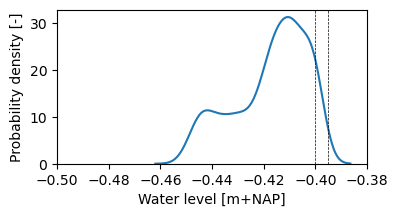

In [106]:
fig, ax = plt.subplots(figsize=(4,2))
# df.loc[:, 'h_nzk'].dropna().plot.kde(bw_method='silverman', ax=ax)
sns.kdeplot(data=df.loc[:, 'h_nzk'].dropna(), bw_method='silverman', ax=ax)

ax.set_xlim(-0.5, -0.38)
ax.axvline(optimization_settings['cvar_wl'], color='k', linestyle='--', linewidth=0.5)
ax.axvline(optimization_settings['var_wl'], color='k', linestyle='--', linewidth=0.5)
ax.set_xlabel('Water level [m+NAP]')
ax.set_ylabel('Probability density [-]')

Text(0, 0.5, 'Probability density [-]')

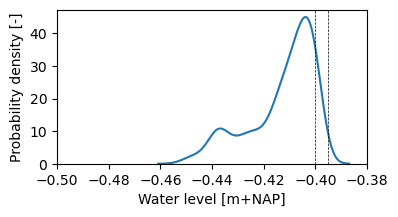

In [78]:
fig, ax = plt.subplots(figsize=(4,2))
# df.loc[:, 'h_nzk'].dropna().plot.kde(bw_method='silverman', ax=ax)
sns.kdeplot(data=df.loc[:, 'h_nzk'].dropna(), bw_method='silverman', ax=ax)

ax.set_xlim(-0.5, -0.38)
ax.axvline(optimization_settings['cvar_wl'], color='k', linestyle='--', linewidth=0.5)
ax.axvline(optimization_settings['var_wl'], color='k', linestyle='--', linewidth=0.5)
ax.set_xlabel('Water level [m+NAP]')
ax.set_ylabel('Probability density [-]')

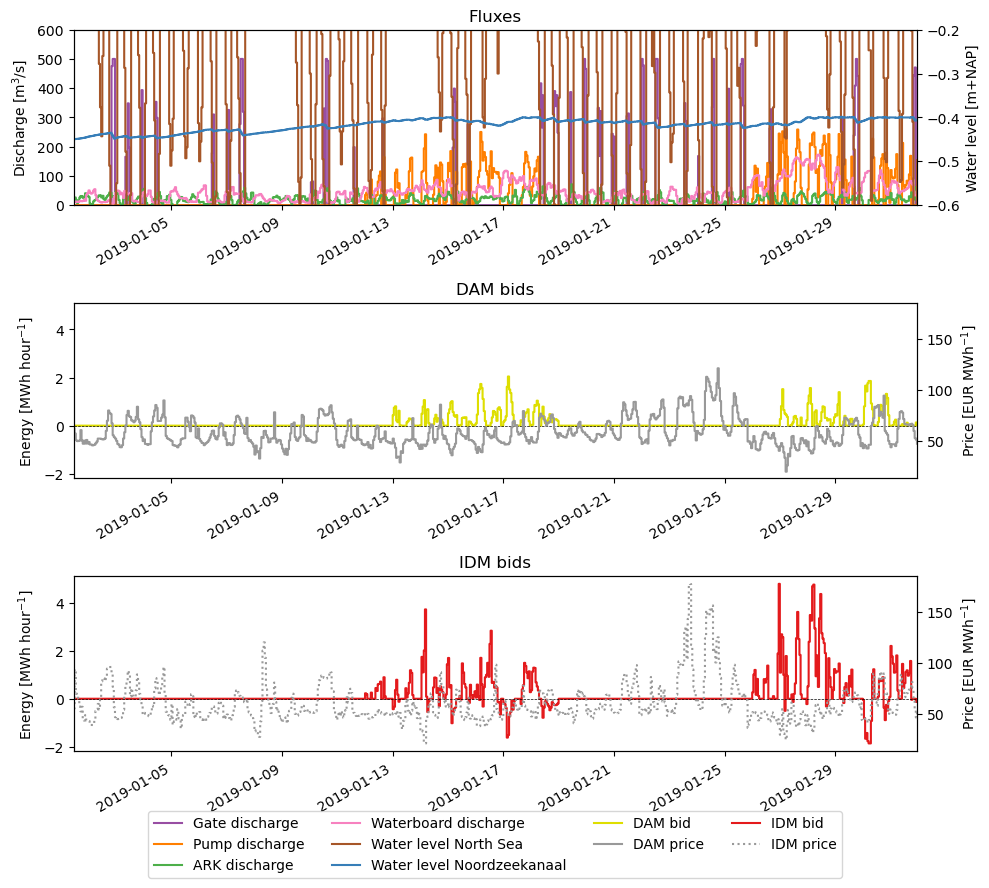

In [107]:
plotter = ResultPlotter(df, plotind)
fig, axes = plotter.combined_plot()

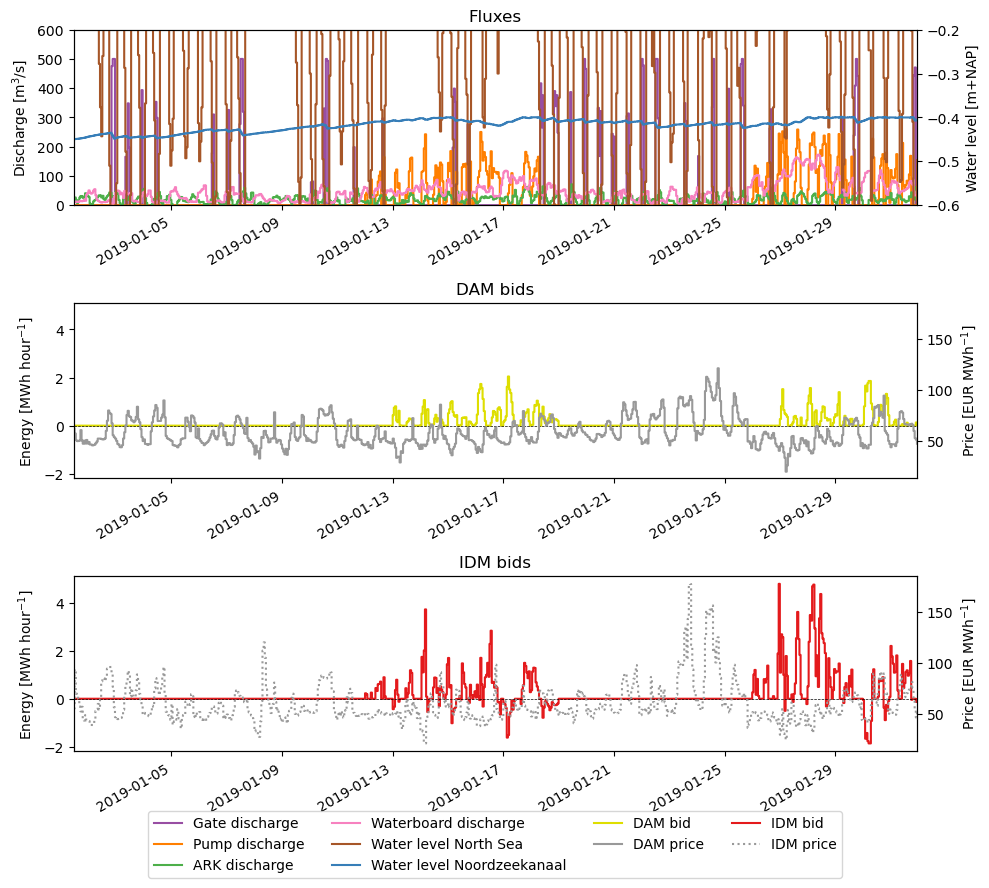

In [108]:
plotter = ResultPlotter(df, plotind)
fig, axes = plotter.combined_plot()

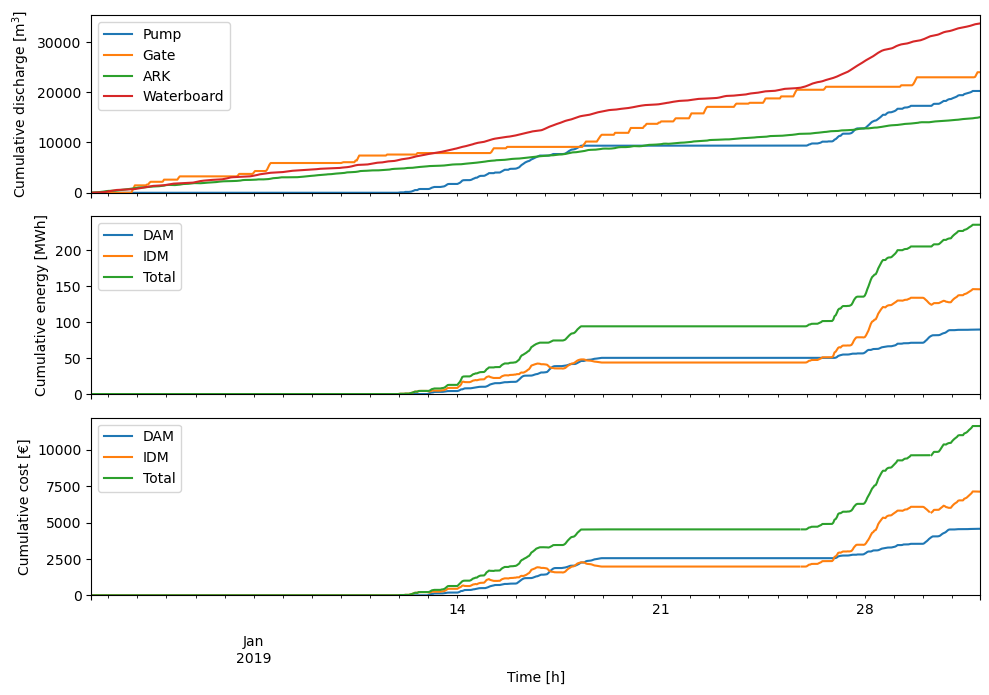

In [109]:
fig, ax = plt.subplots(3, 1, figsize=(10,7), sharex=True)
q_pump = df.loc[:, 'Q_pump'].dropna()
q_gate = df.loc[:, 'Q_gate'].dropna()
q_ark = df.loc[:, 'Q_ark'].dropna()
q_wb = df.loc[:, 'Q_wb'].dropna()
q_pump.cumsum().plot(ax=ax[0])
q_gate.cumsum().plot(ax=ax[0])
q_ark.cumsum().plot(ax=ax[0])
q_wb.cumsum().plot(ax=ax[0])
ax[0].legend(['Pump', 'Gate', 'ARK', 'Waterboard'])
ax[0].set_ylabel('Cumulative discharge [m$^3$]')
ax[0].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[0].set_ylim(0,None)

e_dam = df.loc[:, 'E_dam'].dropna()
e_act = df.loc[:, 'E_act'].dropna()
e_idm = e_act - e_dam
e_dam.cumsum().plot(ax=ax[1])
e_idm.cumsum().plot(ax=ax[1])
e_act.cumsum().plot(ax=ax[1])
ax[1].legend(['DAM', 'IDM', 'Total'])
ax[1].set_ylabel('Cumulative energy [MWh]')
ax[1].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[1].set_ylim(0,None)

c_dam = (e_dam * df.loc[e_dam.index, 'p_dam'])
c_idm = (e_idm * df.loc[e_idm.index, 'p_idm'])
c_tot = c_dam + c_idm
c_dam.cumsum().plot(ax=ax[2])
c_idm.cumsum().plot(ax=ax[2])
c_tot.cumsum().plot(ax=ax[2])
ax[2].legend(['DAM', 'IDM', 'Total'])
ax[2].set_ylabel('Cumulative cost [€]')
ax[2].set_xlabel('Time [h]')
ax[2].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[2].set_ylim(0,None)
fig.tight_layout()


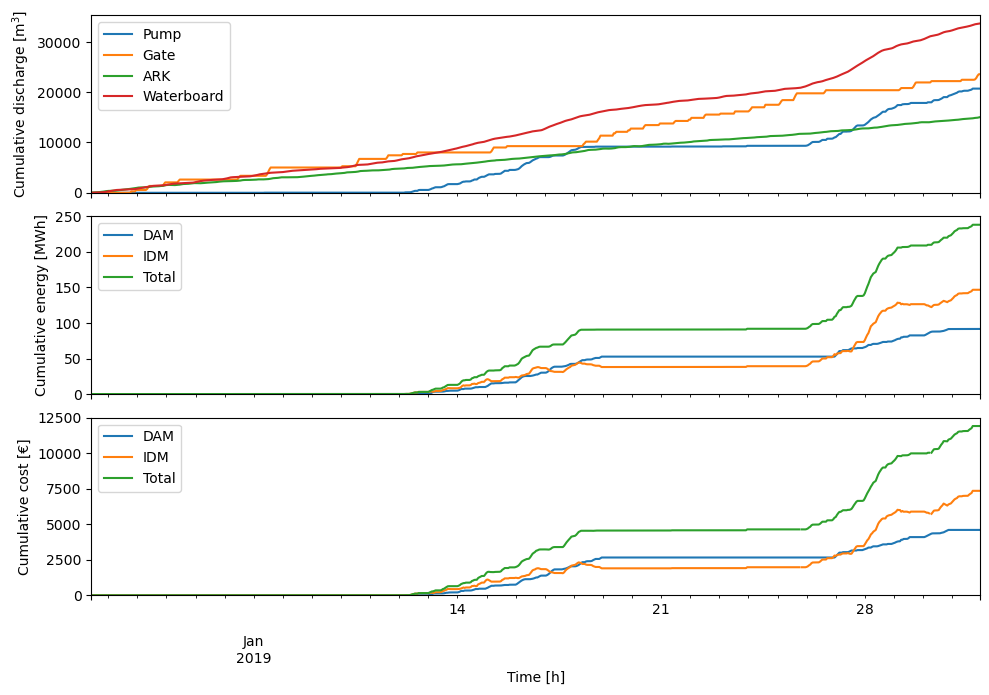

In [82]:
fig, ax = plt.subplots(3, 1, figsize=(10,7), sharex=True)
q_pump = df.loc[:, 'Q_pump'].dropna()
q_gate = df.loc[:, 'Q_gate'].dropna()
q_ark = df.loc[:, 'Q_ark'].dropna()
q_wb = df.loc[:, 'Q_wb'].dropna()
q_pump.cumsum().plot(ax=ax[0])
q_gate.cumsum().plot(ax=ax[0])
q_ark.cumsum().plot(ax=ax[0])
q_wb.cumsum().plot(ax=ax[0])
ax[0].legend(['Pump', 'Gate', 'ARK', 'Waterboard'])
ax[0].set_ylabel('Cumulative discharge [m$^3$]')
ax[0].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[0].set_ylim(0,None)

e_dam = df.loc[:, 'E_dam'].dropna()
e_act = df.loc[:, 'E_act'].dropna()
e_idm = e_act - e_dam
e_dam.cumsum().plot(ax=ax[1])
e_idm.cumsum().plot(ax=ax[1])
e_act.cumsum().plot(ax=ax[1])
ax[1].legend(['DAM', 'IDM', 'Total'])
ax[1].set_ylabel('Cumulative energy [MWh]')
ax[1].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[1].set_ylim(0,None)

c_dam = (e_dam * df.loc[e_dam.index, 'p_dam'])
c_idm = (e_idm * df.loc[e_idm.index, 'p_idm'])
c_tot = c_dam + c_idm
c_dam.cumsum().plot(ax=ax[2])
c_idm.cumsum().plot(ax=ax[2])
c_tot.cumsum().plot(ax=ax[2])
ax[2].legend(['DAM', 'IDM', 'Total'])
ax[2].set_ylabel('Cumulative cost [€]')
ax[2].set_xlabel('Time [h]')
ax[2].set_xlim(q_pump.index[0], q_pump.index[-1])
ax[2].set_ylim(0,None)
fig.tight_layout()


In [357]:
(e_act - e_dam).dropna()

2019-01-01 10:00:00+01:00           0
2019-01-01 11:00:00+01:00    0.089085
2019-01-01 12:00:00+01:00    0.315194
2019-01-01 13:00:00+01:00    0.621418
2019-01-01 14:00:00+01:00    0.423394
                               ...   
2019-01-31 07:00:00+01:00         0.0
2019-01-31 08:00:00+01:00         0.0
2019-01-31 09:00:00+01:00         0.0
2019-01-31 10:00:00+01:00    0.230852
2019-01-31 11:00:00+01:00         0.0
Length: 722, dtype: object

In [358]:
cb_colorlist = [
        '#377eb8', '#ff7f00', '#4daf4a',
        '#f781bf', '#a65628', '#984ea3',
        '#999999', '#e41a1c', '#dede00'
    ]

Text(0, 0.5, 'IDM price [€ MWh$^{-1}$]')

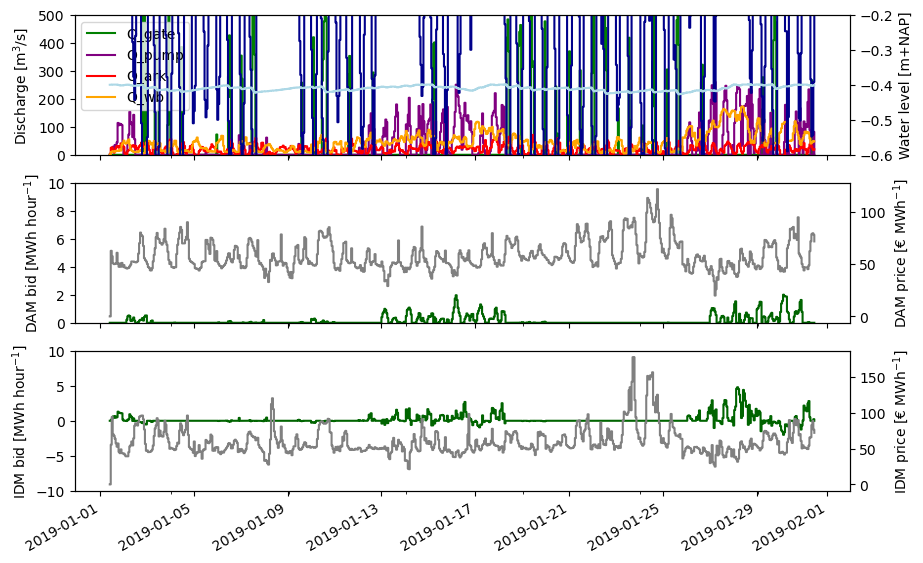

In [359]:
plotind = df.dropna().index
fig, ax = plt.subplots(3, 1, figsize=(10, 7), sharex=True)
df.loc[plotind, ['Q_gate']].plot(drawstyle='steps-post', ax=ax[0], color='green')
df.loc[plotind, ['Q_pump']].plot(drawstyle='steps-post', ax=ax[0], color='purple')
df.loc[plotind, ['Q_ark']].plot(drawstyle='steps-post', ax=ax[0], color='red')
df.loc[plotind, ['Q_wb']].plot(drawstyle='steps-post', ax=ax[0], color='orange')
ax[0].set_ylim(0, 500)
ax[0].set_ylabel('Discharge [m$^3$/s]')
ax_ = ax[0].twinx()
ax_.set_ylim(-0.6, -0.2)
df.loc[plotind, 'h_ns'].plot(drawstyle='steps-post', ax=ax_, color='darkblue')
df.loc[plotind, 'h_nzk'].plot(drawstyle='steps-post', ax=ax_, color='lightblue')
ax_.set_ylabel('Water level [m+NAP]')

df.loc[plotind, 'E_dam'].plot(drawstyle='steps-post', ax=ax[1], color='darkgreen')
ax[1].set_ylabel('DAM bid [MWh hour$^{-1}$]')
ax[1].set_ylim(0, 10)
ax_ = ax[1].twinx()
df.loc[plotind, 'p_dam'].plot(drawstyle='steps-post', ax=ax_, color='grey')
ax_.set_ylabel('DAM price [€ MWh$^{-1}$]')

(df.loc[plotind, 'E_act'] - df.loc[plotind, 'E_dam']).plot(drawstyle='steps-post', ax=ax[2], color='darkgreen')
ax[2].set_ylabel('IDM bid [MWh hour$^{-1}$]')
ax[2].set_ylim(-10, 10)
ax_ = ax[2].twinx()
df.loc[plotind, 'p_idm'].plot(drawstyle='steps-post', ax=ax_, color='grey')
ax_.set_ylabel('IDM price [€ MWh$^{-1}$]')

In [32]:
df.dropna(how='all').tail(20)

,h_nzk,Q_gate,Q_pump,Q_wb,Q_ark,E_act,E_dam,h_ns,p_dam,p_idm
2019-01-06 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 05:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 06:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 07:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 08:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 09:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 10:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 11:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-01-06 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [28]:
df.dropna().shape

(95, 10)